# Tas 4

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys

# Data Preparation

In [3]:
# Apply one-hot encoding to categorical columns
data = pd.read_csv('../data/data.csv')
data_encoded = pd.get_dummies(data, columns=['ProductCategory', 'ProviderId', 'ChannelId'], drop_first=True)

# Handling missing values only for numeric columns
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns
data_encoded[numeric_cols] = data_encoded[numeric_cols].fillna(data_encoded[numeric_cols].mean())

# Check if there are any remaining missing values
print(data_encoded.isnull().sum())


TransactionId                         0
BatchId                               0
AccountId                             0
SubscriptionId                        0
CustomerId                            0
CurrencyCode                          0
CountryCode                           0
ProductId                             0
Amount                                0
Value                                 0
TransactionStartTime                  0
PricingStrategy                       0
FraudResult                           0
ProductCategory_data_bundles          0
ProductCategory_financial_services    0
ProductCategory_movies                0
ProductCategory_other                 0
ProductCategory_ticket                0
ProductCategory_transport             0
ProductCategory_tv                    0
ProductCategory_utility_bill          0
ProviderId_ProviderId_2               0
ProviderId_ProviderId_3               0
ProviderId_ProviderId_4               0
ProviderId_ProviderId_5               0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('../data/data.csv')
# Assuming 'data' contains your original dataset
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=['ProductCategory', 'ProviderId', 'ChannelId'], drop_first=True)


In [23]:
# Handling missing values (if not done previously)
data = pd.read_csv('../data/data.csv')
data_encoded = pd.get_dummies(data, columns=['ProductCategory', 'ProviderId', 'ChannelId'], drop_first=True)
data_encoded.fillna(data_encoded.mean(), inplace=True)

# Assuming 'FraudResult' is the target column in the dataset
# Define your feature matrix (X) and target variable (y)
X = data_encoded.drop(['FraudResult'], axis=1)
y = data_encoded['FraudResult']

KeyboardInterrupt: 

In [6]:
from sklearn.model_selection import train_test_split

# Define your feature matrix (X) and target variable (y)
data = pd.read_csv('../data/data.csv')
data_encoded = pd.get_dummies(data, columns=['ProductCategory', 'ProviderId', 'ChannelId'], drop_first=True)
X = data_encoded.drop(['FraudResult'], axis=1)  # Assuming 'FraudResult' is the target
y = data_encoded['FraudResult']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (76529, 28)
Test set shape: (19133, 28)


# Model Training

# Logistic Regression

Drop unnecessary columns

In [13]:
# Drop unnecessary columns like TransactionId, BatchId, CustomerId
data_cleaned = data.drop(['TransactionId', 'BatchId', 'CustomerId', 'SubscriptionId'], axis=1)

One-Hot Encoding

In [14]:
# Apply one-hot encoding to remaining categorical columns
data_encoded = pd.get_dummies(data_cleaned, columns=['ProductCategory', 'ProviderId', 'ChannelId'], drop_first=True)


Ensure no strings are left in numerical columns

In [15]:
# Check the data types to ensure no non-numeric columns are in the dataset
print(data_encoded.dtypes)

# Ensure that only numerical values are passed for model training
numeric_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns
X = data_encoded[numeric_columns]  # Features should be only numerical
y = data_encoded['FraudResult']  # Target


AccountId                              object
CurrencyCode                           object
CountryCode                             int64
ProductId                              object
Amount                                float64
Value                                   int64
TransactionStartTime                   object
PricingStrategy                         int64
FraudResult                             int64
ProductCategory_data_bundles             bool
ProductCategory_financial_services       bool
ProductCategory_movies                   bool
ProductCategory_other                    bool
ProductCategory_ticket                   bool
ProductCategory_transport                bool
ProductCategory_tv                       bool
ProductCategory_utility_bill             bool
ProviderId_ProviderId_2                  bool
ProviderId_ProviderId_3                  bool
ProviderId_ProviderId_4                  bool
ProviderId_ProviderId_5                  bool
ProviderId_ProviderId_6           

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9984320284325511
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.80      0.22      0.35        36

    accuracy                           1.00     19133
   macro avg       0.90      0.61      0.67     19133
weighted avg       1.00      1.00      1.00     19133



# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       1.00      1.00      1.00        36

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       1.00      1.00      1.00        36

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



# XGBoost

In [20]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       1.00      1.00      1.00        36

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



# Model Evaluation

In [21]:
from sklearn.metrics import roc_auc_score

# Evaluate the ROC-AUC score for each model
roc_auc_log = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc_tree = roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])
roc_auc_forest = roc_auc_score(y_test, forest_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"Logistic Regression ROC-AUC: {roc_auc_log}")
print(f"Decision Tree ROC-AUC: {roc_auc_tree}")
print(f"Random Forest ROC-AUC: {roc_auc_forest}")
print(f"XGBoost ROC-AUC: {roc_auc_xgb}")


Logistic Regression ROC-AUC: 0.9995359946006644
Decision Tree ROC-AUC: 1.0
Random Forest ROC-AUC: 1.0
XGBoost ROC-AUC: 1.0


# Feature Importance

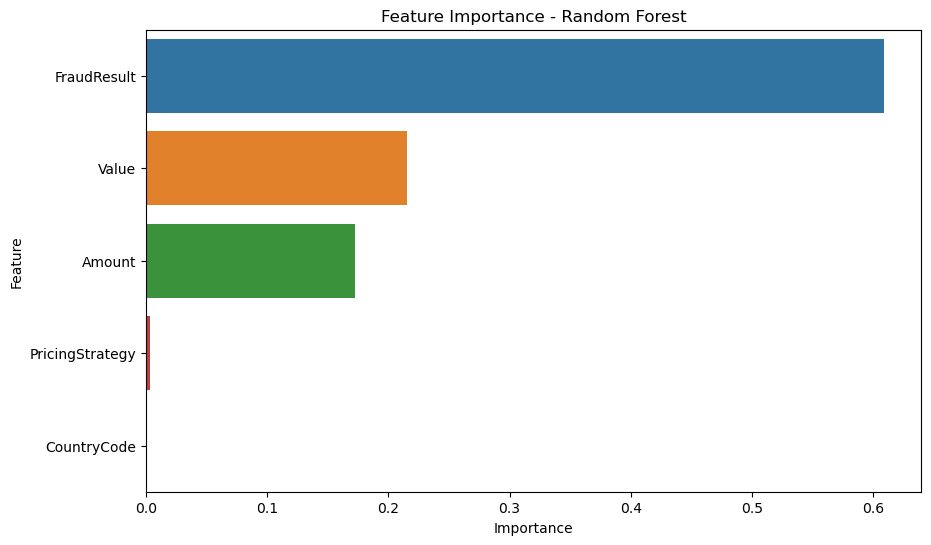

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Random Forest
importances_forest = forest_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances_forest})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()
